# Divvy Trips Data set analysis

Author: Galal Abdelaziz

This notebook presents my analysis of the [Divvy Trips 2019_Q1 dataset](https://divvy-tripdata.s3.amazonaws.com/index.html) for the __Programming For Data Analytics__ project, at [ATU](https://www.atu.ie/).

***

![Banner](img/divvy.jpg)

***

## Introduction:

This project aims to analyze the __Divvy trip__ data from the first quarter of 2019 to gain insights into city-wide biking trends.

***

## Analysis:

### Importing Libraries and Loading the Dataset:

In [382]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

In [383]:
file_path = 'dataset/Divvy_Trips_2019_Q1.csv'
df = pd.read_csv(file_path)

df.head(22)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0
5,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983.0
6,21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984.0
7,21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990.0
8,21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995.0
9,21742452,2019-01-01 00:19:18,2019-01-01 00:24:54,3939,336.0,268,Lake Shore Dr & North Blvd,141,Clark St & Lincoln Ave,Subscriber,Male,1996.0


### Inspecting the Dataset:

In [384]:
total_trips = df.shape[0]
print(f'Total number of Divvy trips in Q1 2019: {total_trips}')

Total number of Divvy trips in Q1 2019: 365069


In [385]:
unique_bikes = df['bikeid'].nunique()
print(f'Number of unique bikes utilized in Q1 2019: {unique_bikes}')

Number of unique bikes utilized in Q1 2019: 4769


In [386]:
missing_counts = {}

for column in df.columns:
    nan_count = df[column].isnull().sum()
    empty_count = (df[column] == '').sum()
    total_missing = nan_count + empty_count
    missing_counts[column] = total_missing

print("Column Headers and Missing Values:")
for column, count in missing_counts.items():
    print(f"{column}: {count} missing values")

Column Headers and Missing Values:
trip_id: 0 missing values
start_time: 0 missing values
end_time: 0 missing values
bikeid: 0 missing values
tripduration: 0 missing values
from_station_id: 0 missing values
from_station_name: 0 missing values
to_station_id: 0 missing values
to_station_name: 0 missing values
usertype: 0 missing values
gender: 19711 missing values
birthyear: 18023 missing values


In [387]:
current_year = 2019

df['age'] = current_year - df['birthyear']

records_1938_or_older = df[df['birthyear'] <= 1938].shape[0]

average_age_all = df['age'].mean()
average_age_excluding_1938 = df[df['birthyear'] > 1938]['age'].mean()
average_age_1938_or_older = df[df['birthyear'] <= 1938]['age'].mean()

print(f'Number of users where the birth year is 1938 or older: {records_1938_or_older}')
print(f'Average age of users born in 1938 or earlier: {average_age_1938_or_older:.2f}')
print(f'Average age of all users: {average_age_all:.2f}')
print(f'Average age excluding those born in 1938 or earlier: {average_age_excluding_1938:.2f}')


Number of users where the birth year is 1938 or older: 186
Average age of users born in 1938 or earlier: 105.65
Average age of all users: 37.33
Average age excluding those born in 1938 or earlier: 37.29


In [388]:
gender_counts = df['gender'].value_counts()
gender_counts_df = gender_counts.reset_index()
gender_counts_df.columns = ['Gender', 'Count']

print("Number of Males and Females:")
print(gender_counts_df.to_string(index=False))

Number of Males and Females:
Gender  Count
  Male 278440
Female  66918


In [389]:
user_type_counts = df['usertype'].value_counts()
user_type_counts_df = user_type_counts.reset_index()
user_type_counts_df.columns = ['User  Type', 'Count']

print("Number of Subscribers and Customers:")
print(user_type_counts_df.to_string(index=False))

Number of Subscribers and Customers:
User  Type  Count
Subscriber 341906
  Customer  23163


In [390]:
tripduration_stats = df['tripduration'].describe()
tripduration_stats_df = tripduration_stats.reset_index()
tripduration_stats_df.columns = ['Statistic', 'Value']
print("Trip Duration Statistics:")
print(tripduration_stats_df.to_string(index=False))

Trip Duration Statistics:
Statistic  Value
    count 365069
   unique   6666
      top  279.0
     freq    586


### Data Preparation, Cleaning and Handling Missing Data:

In [391]:
# Data Cleaning
df['gender'].fillna('missing', inplace=True)

df = df[df['birthyear'] > 1938]

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [392]:
# Data Preparation

df['day_of_week'] = df['start_time'].dt.day_name()

df['start_time_only'] = df['start_time'].dt.time
df['end_time_only'] = df['end_time'].dt.time

df['duration_minutes'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

df.head()



,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,day_of_week,start_time_only,end_time_only,duration_minutes
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0,30.0,Tuesday,00:04:37,00:11:07,6.500000
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0,29.0,Tuesday,00:08:13,00:15:34,7.350000
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0,25.0,Tuesday,00:13:23,00:27:12,13.816667
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0,26.0,Tuesday,00:13:45,00:43:28,29.716667
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0,25.0,Tuesday,00:14:52,00:20:56,6.066667


### Findings From The Dataset Inspection:

#### Dataset Overall:

#### Variables:

**Numeric Variables:**

- **trip_id**: Unique identifier for each trip (numeric but generally treated as a categorical variable due to its uniqueness).
- **bikeid**: Unique identifier for the bike used in the trip.
- **tripduration**: Duration of the trip in seconds.
- **from_station_id**: ID of the station where the trip started.
- **to_station_id**: ID of the station where the trip ended.
- **birthyear**: Birth year of the user.

**Categorical Variables:**

- **usertype**: The type of user (e.g., Subscriber, Customer).
- **gender**: Gender of the user (e.g., Male, Female).
- **from_station_name**: Name of the station where the trip started.
- **to_station_name**: Name of the station where the trip ended.

**Datetime Variables:**

- **start_time**: The start date and time of the trip.
- **end_time**: The end date and time of the trip.


#### User Demographics Analysis:

Following the analysis of the user demographics for the dataset, the key findings are summarized below:

**Age Analysis:**
- **Users born in 1938 or earlier**: A total of **186 users** were identified as being born in 1938 or earlier. The **average age** of these users in 2019 is **105.65 years**.
- **Exclusion of Older Users**: All users born in 1938 or earlier were excluded from further analysis to maintain relevance for a more typical user base.
- **Average Age of All Users**: After excluding the older users, the **average age of all remaining users** in 2019 is **37.33 years**.
- **Age Range**: The **youngest user** included in the analysis is **16 years old** (born in 2003), and the **oldest user** included is **81 years old** (born in 1938).

**Gender Breakdown:**
- **Male Users**: There are **278,440 male users**.
- **Female Users**: The dataset includes **66,918 female users**.

**User Type:**
- **Subscribers**: A large majority of users are **subscribers**, with **341,906 total subscribers**.
- **Customers**: There are **23,163 customers**, a smaller group compared to subscribers.

**Key Takeaways:**
- The dataset represents a diverse age range, with a significant portion of users being in the **30-40 age group**.
- The vast majority of users are **subscribers**, and there is a notable **gender imbalance** with a higher number of male users.
- The exclusion of users born in 1938 or earlier allowed for a more focused analysis on typical users of the system.

This analysis provides a foundational understanding of the user demographics, helping to guide further insights and potential actions for user engagement and service improvements.


#### Missing Data:

The dataset contains a total of **365,069 trips** recorded in the first quarter of 2019. Most columns have complete data, with no missing values for key trip information such as `trip_id`, `start_time`, `end_time`, `bikeid`, `tripduration`, `from_station_id`, `from_station_name`, `to_station_id`, `to_station_name`, and `usertype`.  

However, demographic columns have missing values:  
- **Gender**: Missing for **19,711 trips** (~5.4% of the dataset).  
- **Birthyear**: Missing for **18,023 trips** (~4.9% of the dataset).  

The missing data is confined to user demographic fields and may represent users who did not provide personal information during sign-up or casual riders who are not required to input these details. These gaps could impact analyses involving age and gender distribution but do not affect trip-level analyses such as station usage or trip durations.


### Variables analysis and Data Visualisation:

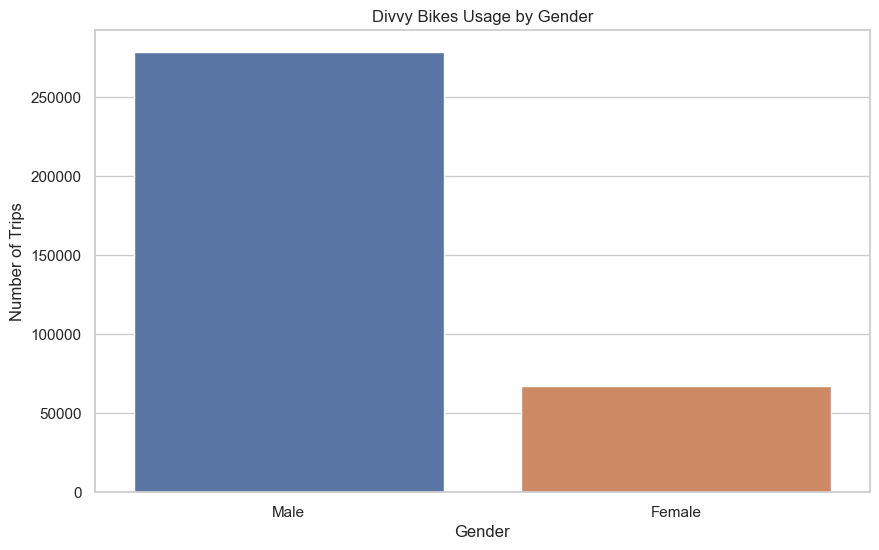

In [393]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['gender'] != 'missing'], x='gender')
plt.title('Divvy Bikes Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Trips')
plt.show()

This chart displays the distribution of Divvy bike trips between **Male** and **Female** riders. Male riders significantly outnumber female riders in terms of trip frequency, indicating a potential gender disparity in Divvy bike usage.

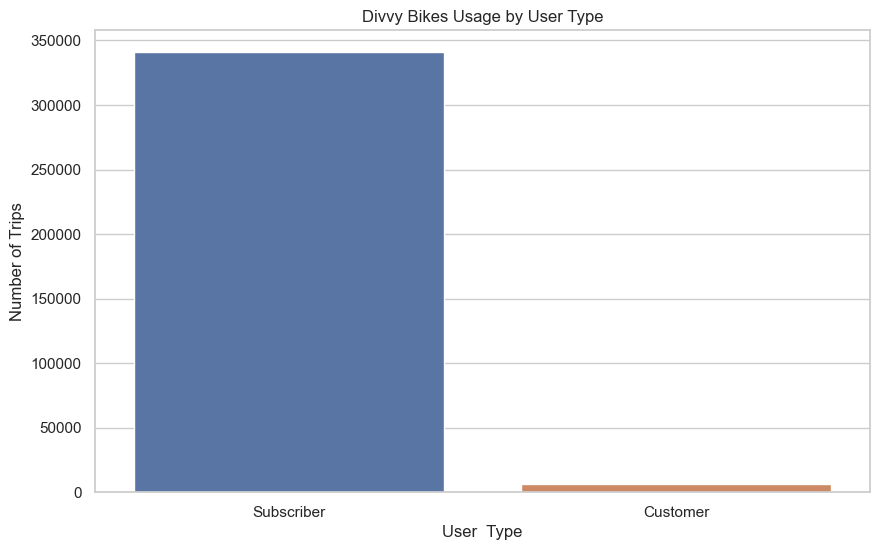

In [394]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='usertype')
plt.title('Divvy Bikes Usage by User Type')
plt.xlabel('User  Type')
plt.ylabel('Number of Trips')
plt.show()

This chart highlights the distribution of Divvy bike trips based on user type. **Subscribers** account for the overwhelming majority of trips, while casual **Customers** represent a small fraction. This suggests that regular, subscription-based users dominate the service's utilization.

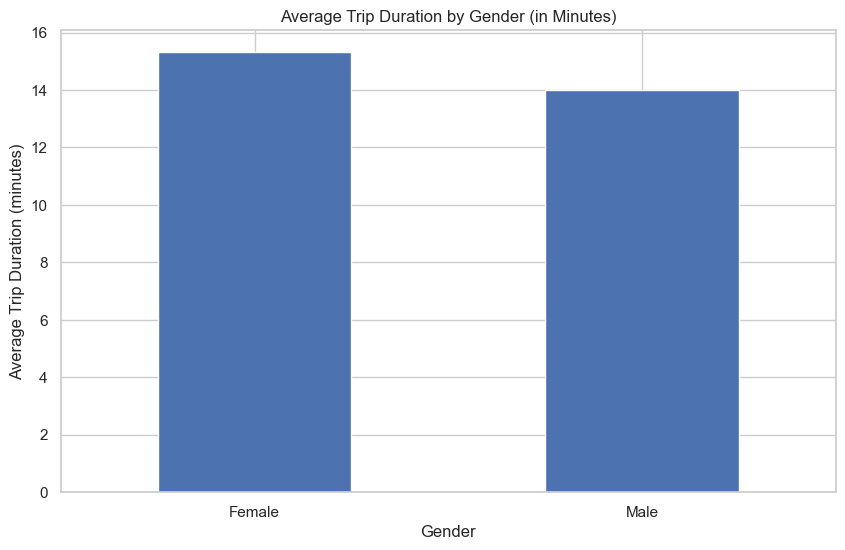

In [408]:
avg_duration_by_gender = df[df['gender'].isin(['Male', 'Female'])].groupby('gender')['duration_minutes'].mean()  # Calculate average duration in minutes

plt.figure(figsize=(10, 6))
avg_duration_by_gender.plot(kind='bar')
plt.title('Average Trip Duration by Gender (in Minutes)')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

This chart highlights the average trip duration based on user gender. **Female** users have an average trip duration of approximately **15 minutes**, while **Male** users average around **14 minutes**. This suggests that female users tend to have slightly longer trips compared to male users.

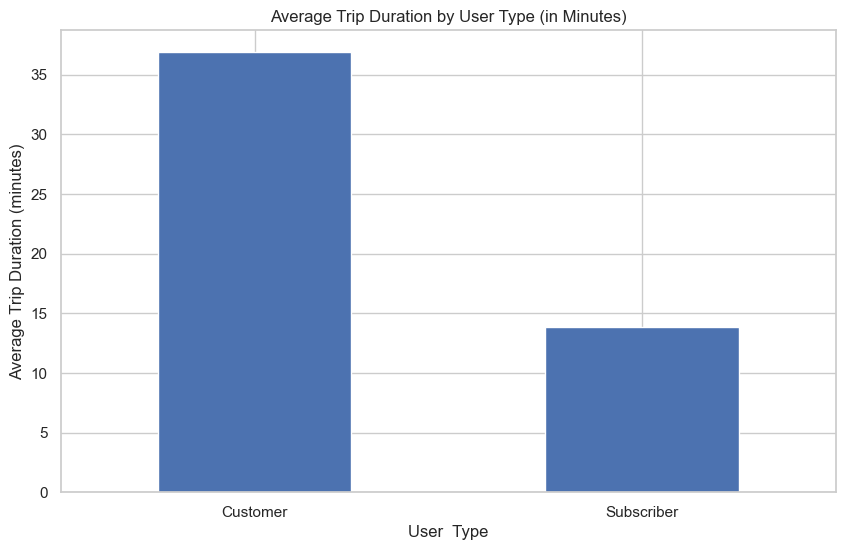

In [406]:
avg_duration_by_user = df.groupby('usertype')['duration_minutes'].mean()  # Calculate average duration in minutes

plt.figure(figsize=(10, 6))
avg_duration_by_user.plot(kind='bar')
plt.title('Average Trip Duration by User Type (in Minutes)')
plt.xlabel('User  Type')
plt.ylabel('Average Trip Duration (minutes)')
plt.xticks(rotation=0)
plt.show()

This chart highlights the average trip duration based on user type. **Customers** have a significantly longer average trip duration of approximately 36 minutes, while **Subscribers** average around 12 minutes. This suggests that casual, non-subscriber users tend to take longer trips compared to regular, subscription-based users.

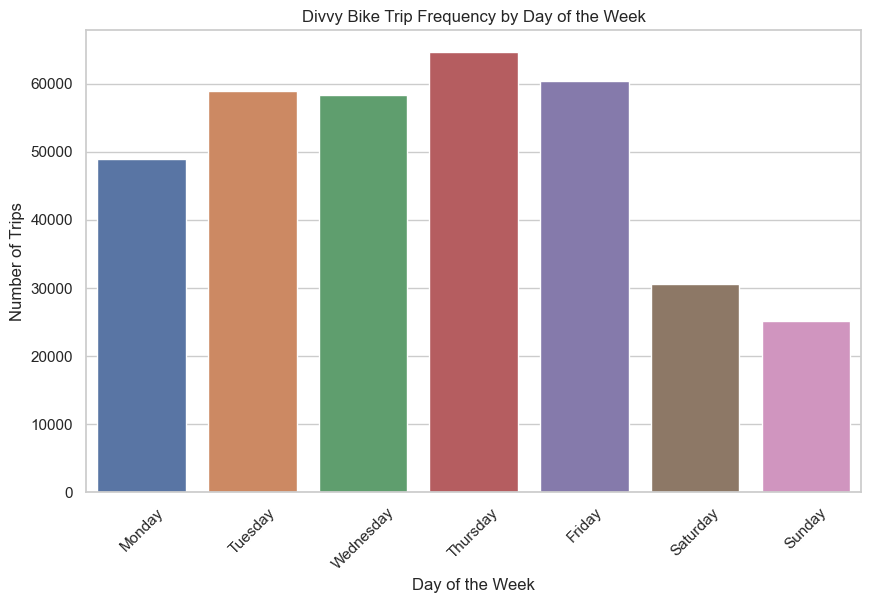

In [396]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Divvy Bike Trip Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

The chart shows the distribution of Divvy bike trips across the days of the week. **Weekdays**, particularly Thursday and Friday, see the highest number of trips, indicating a strong correlation with commuter or workday usage. In contrast, **weekends** (Saturday and Sunday) exhibit a noticeable decline in bike usage, suggesting less frequent trips during leisure days.

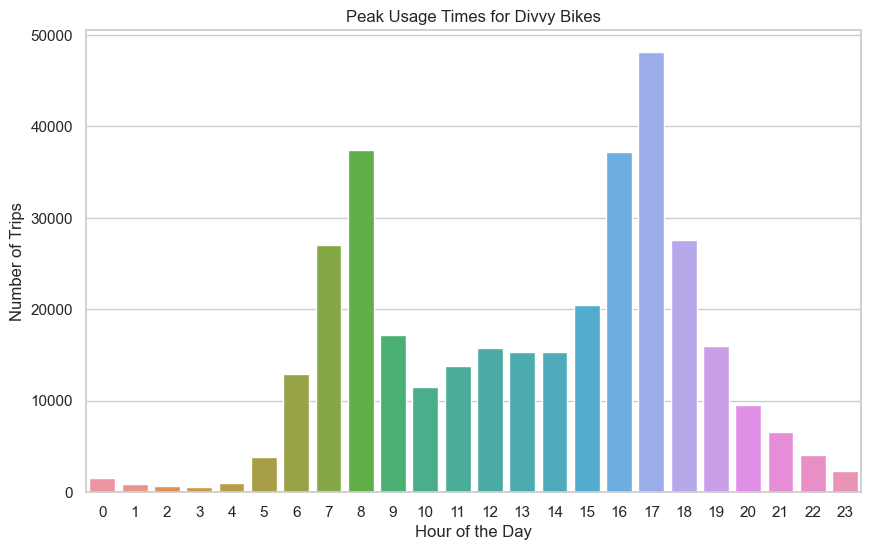

In [397]:
df['start_hour'] = df['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='start_hour')
plt.title('Peak Usage Times for Divvy Bikes')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.show()

This chart highlights the peak usage times for Divvy bikes. The highest bike usage occurs at 17:00 (5 PM), with nearly 50,000 trips. A significant surge is also seen at 8:00 (8 AM), with around 35,000 trips. After the 17:00 peak, usage decreases steadily, becoming minimal after 21:00 (9 PM). Moderate usage is recorded between 10:00 (10 AM) and 14:00 (2 PM), while early morning hours (0:00 to 5:00) show very low usage.

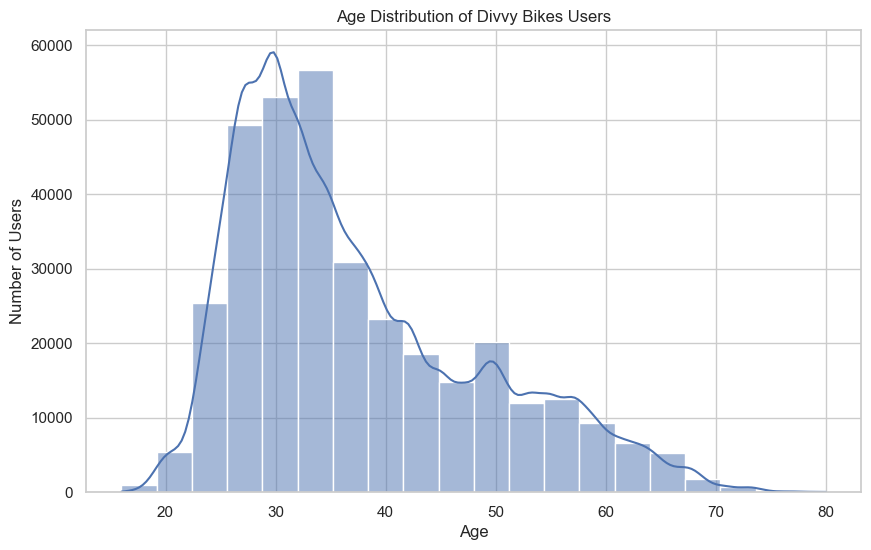

In [398]:
df['age'] = 2019 - df['birthyear']

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Divvy Bikes Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

This chart highlights the age distribution of Divvy bike users. The largest user group is in their early 30s, with a peak around age 30. The distribution is right-skewed, indicating a higher concentration of younger users compared to older ones. Users range in age from approximately 20 to 80 years, with a noticeable decline in the number of users as age increases beyond 40. Fewer users are found in the 60+ age group.


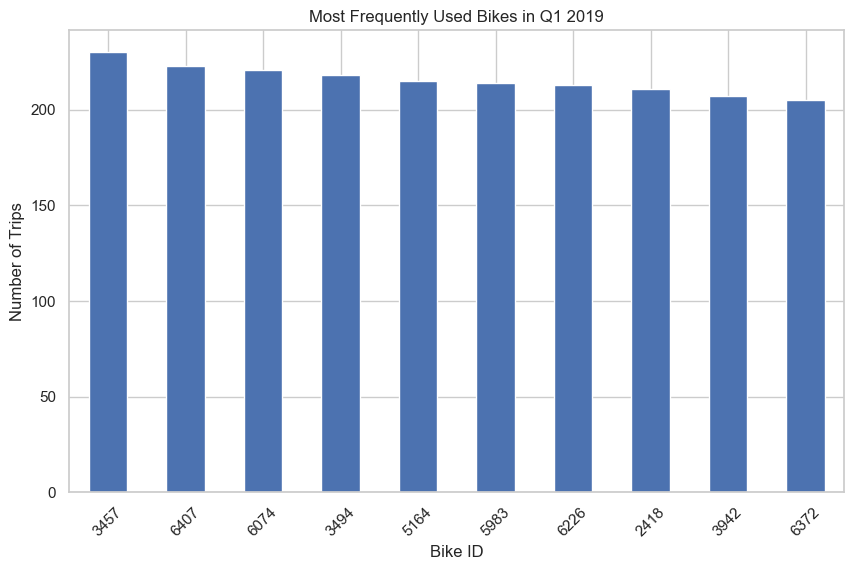

In [399]:
most_used_bikes = df['bikeid'].value_counts().head(10)

plt.figure(figsize=(10, 6))
most_used_bikes.plot(kind='bar')
plt.title('Most Frequently Used Bikes in Q1 2019')
plt.xlabel('Bike ID')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

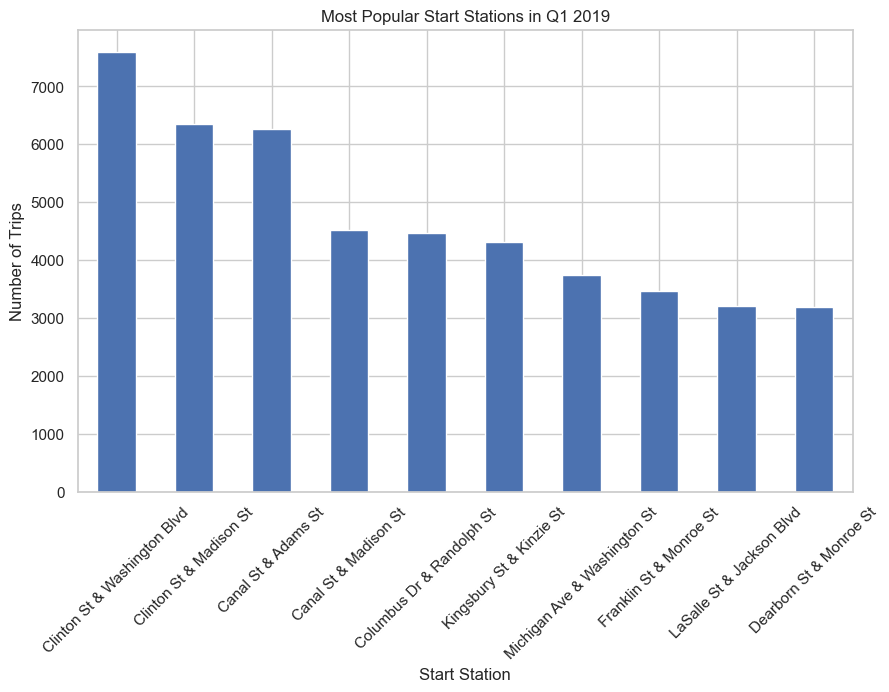

In [400]:
popular_start_stations = df['from_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
popular_start_stations.plot(kind='bar')
plt.title('Most Popular Start Stations in Q1 2019')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

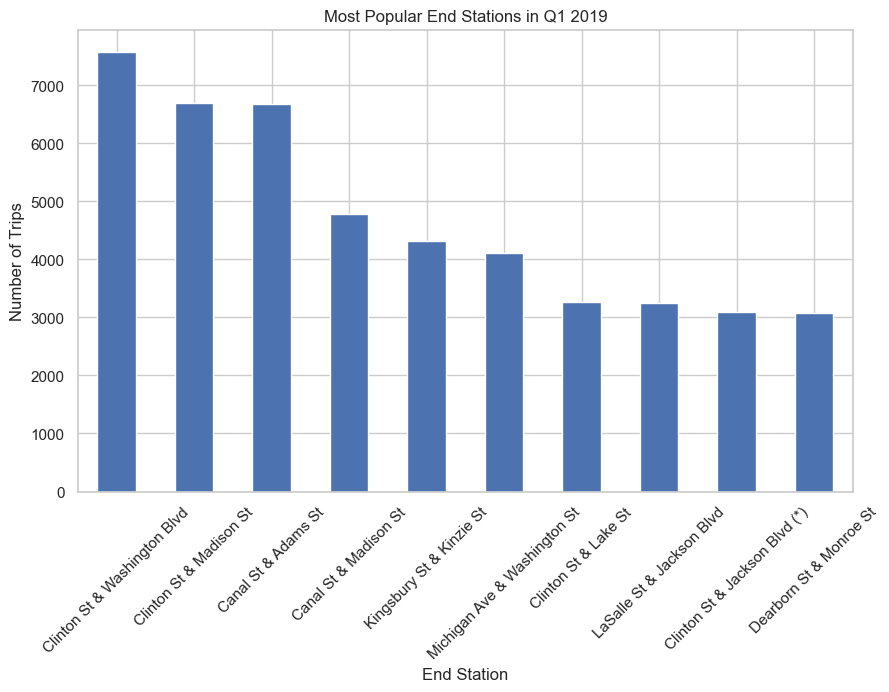

In [401]:
popular_end_stations = df['to_station_name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
popular_end_stations.plot(kind='bar')
plt.title('Most Popular End Stations in Q1 2019')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()

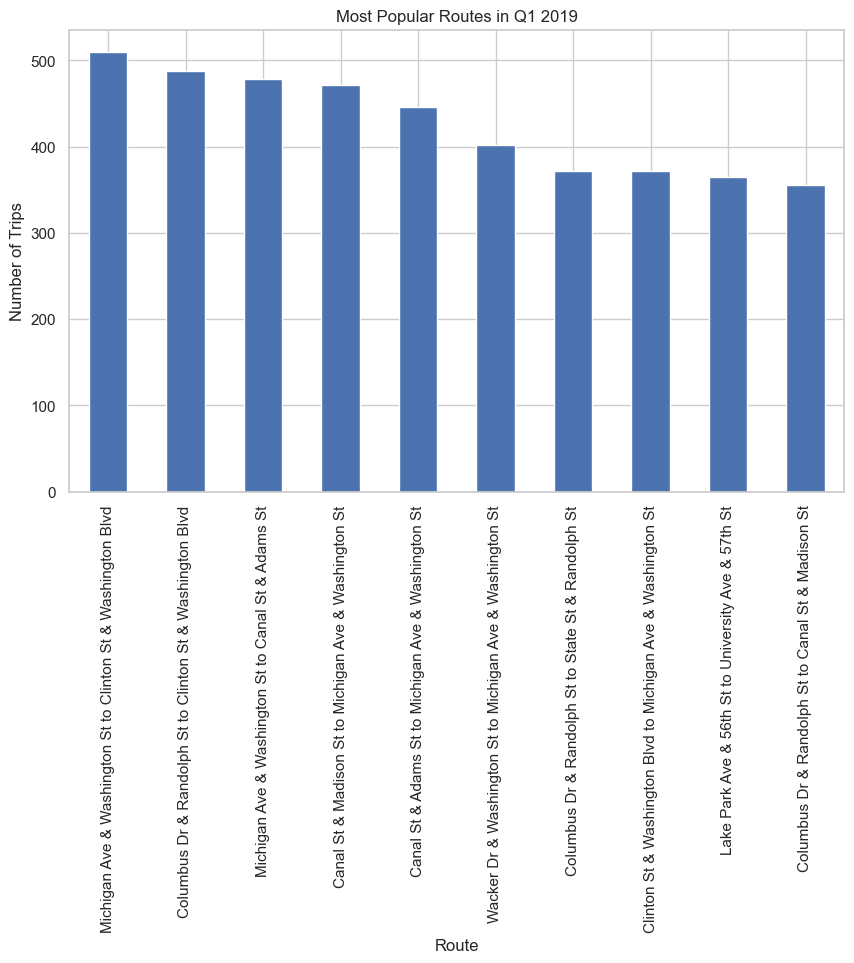

In [402]:
df['route'] = df['from_station_name'] + ' to ' + df['to_station_name']

popular_routes = df['route'].value_counts().head(10)

plt.figure(figsize=(10, 6))
popular_routes.plot(kind='bar')
plt.title('Most Popular Routes in Q1 2019')
plt.xlabel('Route') 
plt.ylabel('Number of Trips') 
plt.show()  

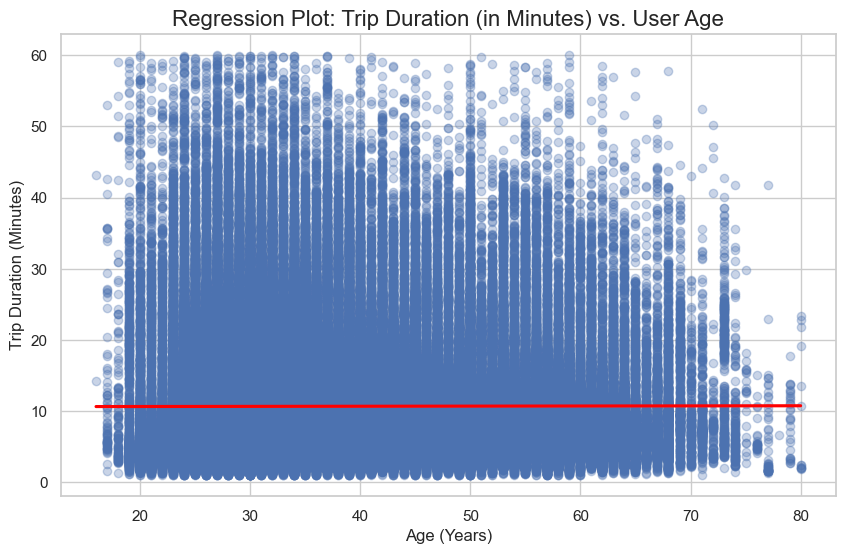

In [405]:
df_filtered = df[df['duration_minutes'] <= 60].copy()  # Create a copy of the filtered DataFrame

plt.figure(figsize=(10, 6))
sns.regplot(data=df_filtered, x='age', y='duration_minutes', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Regression Plot: Trip Duration (in Minutes) vs. User Age', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Trip Duration (Minutes)', fontsize=12)
plt.show()

This plot illustrates the relationship between user age (in years) and trip duration (in minutes). The data points are spread across a wide range of ages and trip durations, with the majority of trips clustered between 0 and 60 minutes. Despite this, there is no clear upward or downward trend in the scatter of points, suggesting that age does not have a strong influence on trip duration. A red horizontal line at around 10 minutes highlights a potential reference or average trip duration, but overall, the plot indicates that age and trip duration are not strongly correlated.